In [1]:
# Step 0. Load libraries and custom functions
# Matrices and Dataframes ----------------------------------------------
import numpy as np
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
# Deep learning --------------------------------------------------------
import tensorflow as tf

In [5]:
# Step 1. Create data
# 1.1 Create mvnorm points
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1, 0.5],[0.5, 1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5],[0.5, 1]],
    size = num_samples_per_class
)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [6]:
# 1.2 Create targets for our dataset
targets = np.vstack((np.zeros((num_samples_per_class,1), dtype=np.float32),
                     np.ones((num_samples_per_class, 1), dtype=np.float32)))

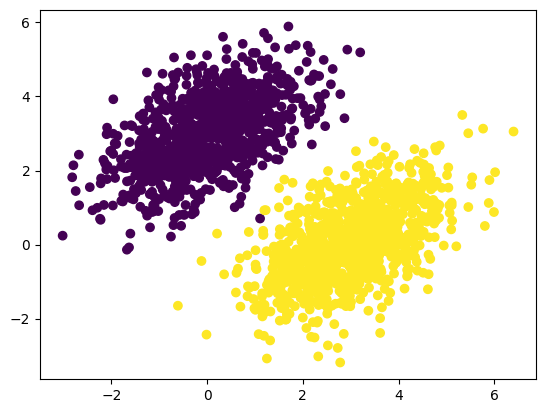

In [9]:
# 1.3 Let's plot our data
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [10]:
# Step 2. Create linear classifier 
# 2.1 Set inputs
input_dim = 2
output_dim = 1

In [12]:
# 2.2 Initialize weights and bias
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

In [13]:
# 2.3 Create forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

In [14]:
# 2.4 Create loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [15]:
# 2.6 Create training step
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [16]:
# 2.7 Run the process (epochs)
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step+1}: {loss:.4f}')

Loss at step 1: 4.0988
Loss at step 2: 0.4764
Loss at step 3: 0.1781
Loss at step 4: 0.1276
Loss at step 5: 0.1131
Loss at step 6: 0.1045
Loss at step 7: 0.0972
Loss at step 8: 0.0907
Loss at step 9: 0.0848
Loss at step 10: 0.0794
Loss at step 11: 0.0745
Loss at step 12: 0.0701
Loss at step 13: 0.0660
Loss at step 14: 0.0623
Loss at step 15: 0.0589
Loss at step 16: 0.0559
Loss at step 17: 0.0531
Loss at step 18: 0.0505
Loss at step 19: 0.0482
Loss at step 20: 0.0461
Loss at step 21: 0.0442
Loss at step 22: 0.0424
Loss at step 23: 0.0408
Loss at step 24: 0.0394
Loss at step 25: 0.0380
Loss at step 26: 0.0368
Loss at step 27: 0.0357
Loss at step 28: 0.0347
Loss at step 29: 0.0338
Loss at step 30: 0.0330
Loss at step 31: 0.0322
Loss at step 32: 0.0316
Loss at step 33: 0.0309
Loss at step 34: 0.0304
Loss at step 35: 0.0298
Loss at step 36: 0.0294
Loss at step 37: 0.0289
Loss at step 38: 0.0285
Loss at step 39: 0.0282
Loss at step 40: 0.0279


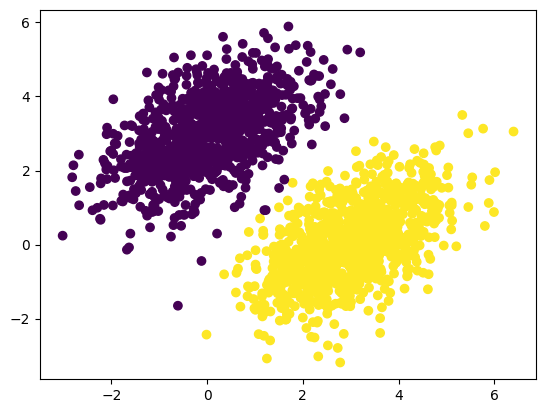

In [18]:
# 2.8 Calculate predictions
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:, 0] > 0.5)
plt.show()

In [19]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.18138577],
       [-0.12383001]], dtype=float32)>

In [20]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.39204794], dtype=float32)>

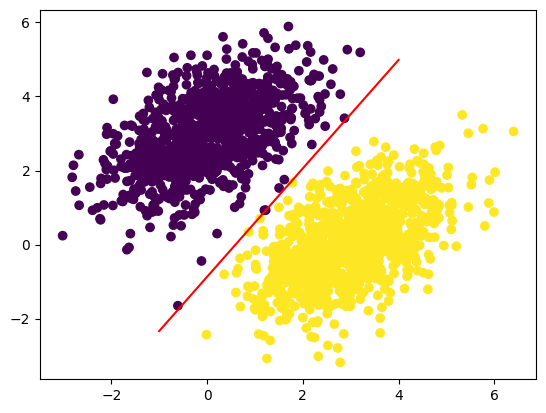

In [22]:
x = np.linspace(-1,4,100)
y = -W[0]/W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:, 0]>0.5)
plt.show()

In [1]:
import tensorflow as tf

cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data()
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=100,)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=64)

169001437/169001437 [==============================] - 28s 0us/step


2024-02-04 17:52:28.768777: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-02-04 17:52:28.768801: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-02-04 17:52:28.768806: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-02-04 17:52:28.768860: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-04 17:52:28.768895: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2024-02-04 17:52:32.571999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 107s 122ms/step - loss: 4.7567 - accuracy: 0.0675
Epoch 2/5
782/782 [==============================] - 59s 75ms/step - loss: 4.0523 - accuracy: 0.1297
Epoch 3/5
782/782 [==============================] - 59s 75ms/step - loss: 3.9252 - accuracy: 0.1517
Epoch 4/5
782/782 [==============================] - 58s 75ms/step - loss: 3.5546 - accuracy: 0.1953
Epoch 5/5
782/782 [==============================] - 59s 75ms/step - loss: 3.3168 - accuracy: 0.2300
